# Immagini

In [1]:
import numpy as np
import cv2 as cv
import va
from ipywidgets import interact

## istogramma di un'immagine

In [2]:
img = cv.imread('immagini/badContrast.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

h, w = img.shape[:2]
scala = 3

img = cv.resize(img, (w//scala, h//scala))

hist = cv.calcHist([img], [0], None, [256], [0, 255]).squeeze()
hist = va.draw_hist(hist)
va.show(img, hist)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


## contrast stretching

In [3]:
def contrast_stretching(img, a, b):
    img = 255*(img.astype(float)-a)/(b-a)
    
    return np.clip(img, 0, 255).astype(np.uint8)

In [4]:
@interact(minPerc=(0,10), maxPerc=(90,100))
def conrast_stretching(minPerc=5, maxPerc=95):
    stretched = img.copy()
    stretched = contrast_stretching(stretched, np.percentile(img, minPerc), np.percentile(img, maxPerc))
    va.show(img, hist)
    va.show(stretched, va.draw_hist(cv.calcHist([stretched], [0], None, [256], [0, 255]).squeeze()))

interactive(children=(IntSlider(value=5, description='minPerc', max=10), IntSlider(value=95, description='maxP…

## equalizzazione

,
,

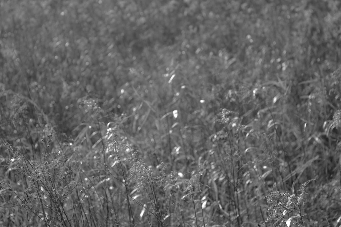
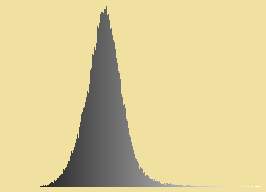

,
,

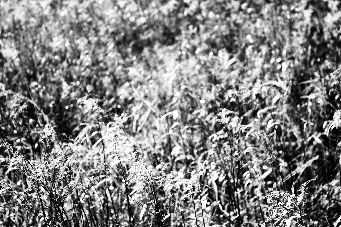
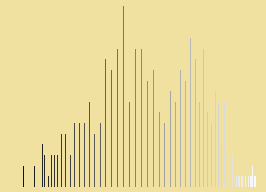

In [79]:
equalized = img.copy()
equalized = cv.equalizeHist(equalized)
va.show(img, hist)
va.show(equalized, va.draw_hist(cv.calcHist(equalized, [0], None, [256], [0, 255]).squeeze()))

## binarizzazione

,
,

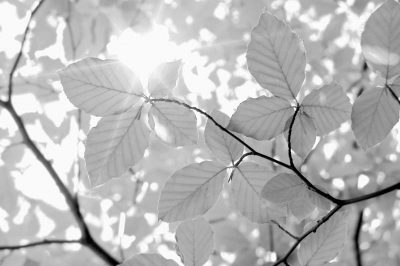
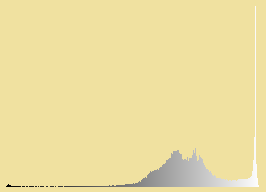

In [5]:
img = cv.imread('immagini/leaves.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

h, w = img.shape[:2]
scala = 2

img = cv.resize(img, (w//scala, h//scala))

hist = cv.calcHist([img], [0], None, [256], [0, 255]).squeeze()
hist = va.draw_hist(hist)
va.show(img, hist)

In [6]:
@interact(thresh=(0, 255))
def binarization(thresh):
    bw = img.copy()
    _, bw = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)
    va.show(img, bw)

interactive(children=(IntSlider(value=127, description='thresh', max=255), Output()), _dom_classes=('widget-in…

In [7]:
@interact(k=(3, 21, 2), s=(0, 20))
def binarization(k=9, s=0):
    bw = img.copy()
    bw = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, k, s)
    va.show(img, bw)

interactive(children=(IntSlider(value=9, description='k', max=21, min=3, step=2), IntSlider(value=0, descripti…

## Look up table

,
,

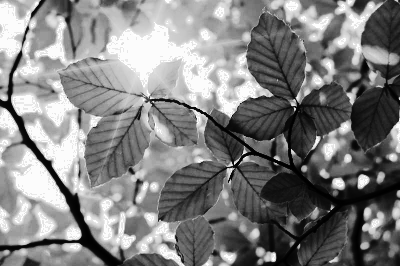
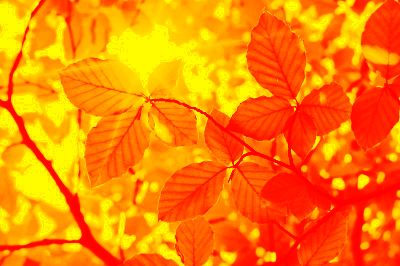

In [8]:
img = cv.equalizeHist(img)
mapped = img.copy()
mapped = cv.applyColorMap(mapped, cv.COLORMAP_AUTUMN)
va.show(img, mapped)

## Resize

,
,

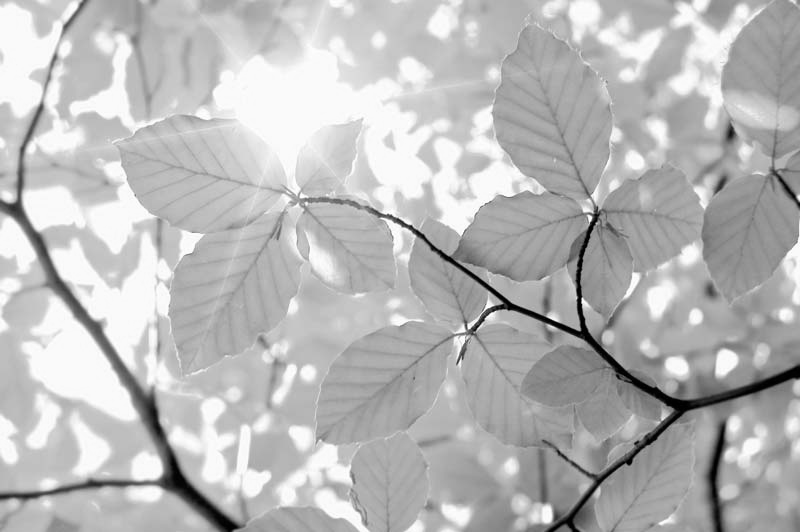
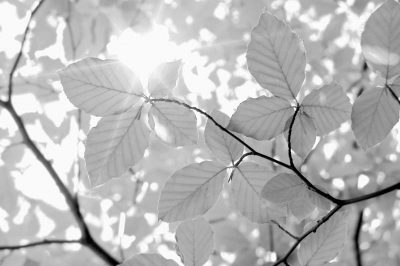

In [27]:
img = cv.imread('immagini/leaves.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

resized = img.copy()
h, w = img.shape[:2]
scala = 2

resized = cv.resize(resized, (w//scala, h//scala))

va.show(img, resized)

## Trasformazioni affini

,
,

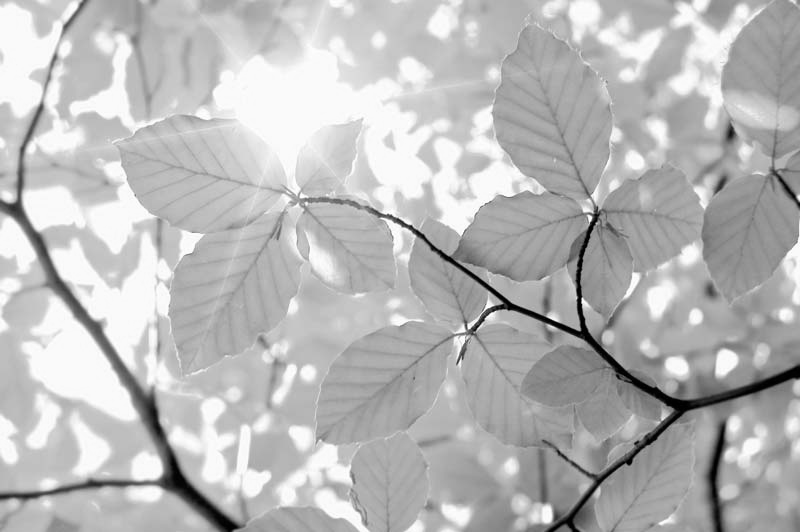
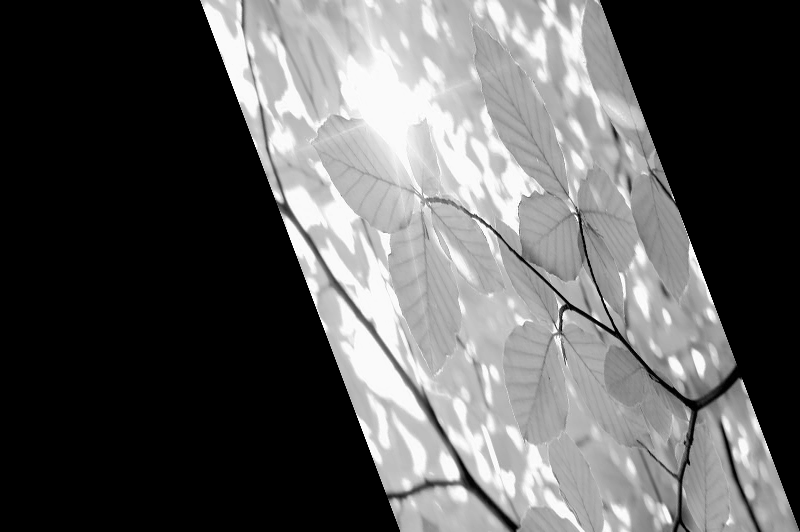

In [41]:
img = cv.imread('immagini/leaves.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
scala = 2

h, w = img.shape[:2]

transformed = img.copy()
t = cv.getAffineTransform(np.array([[0, 0], [w-1, 0], [w-1, h-1]], np.float32),
                               np.array([[200, 0], [w-1-200, 0], [w-1, h-1]], np.float32))
transformed = cv.warpAffine(transformed, t, (w, h), None, cv.INTER_CUBIC, cv.BORDER_CONSTANT, (0,0,0))
va.show(img, transformed)

## Trasformazioni proiettive

,
,

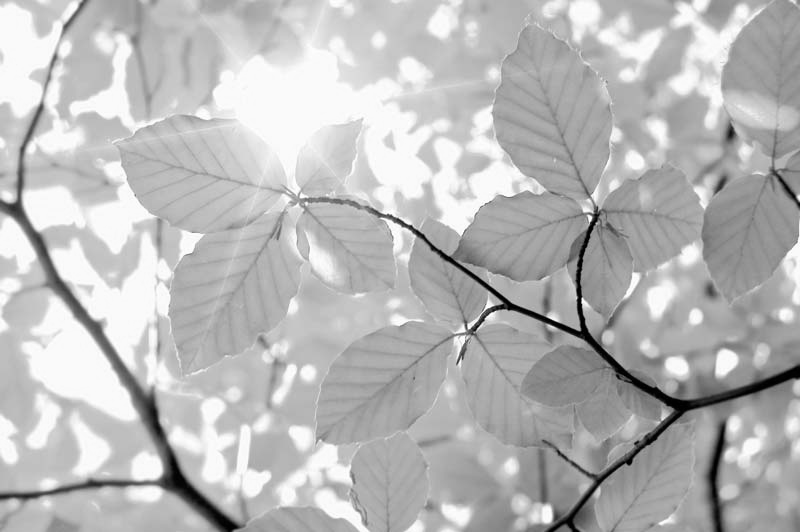
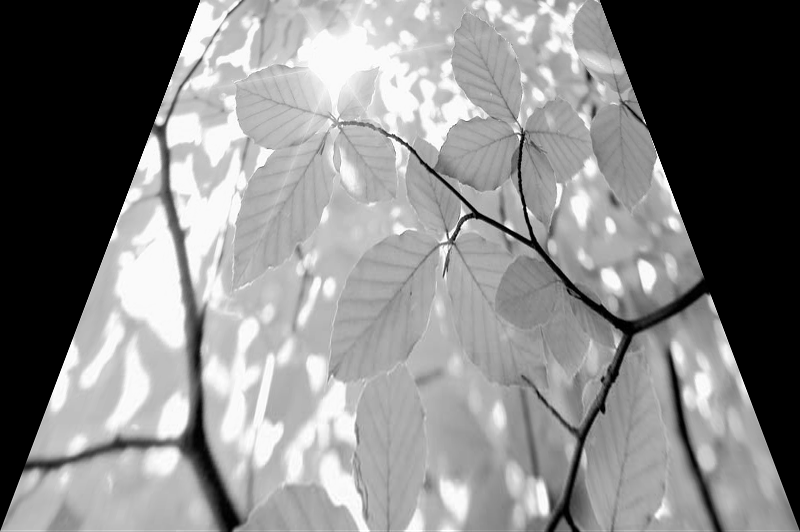

In [36]:
img = cv.imread('immagini/leaves.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
scala = 2

h, w = img.shape[:2]

transformed = img.copy()
t = cv.getPerspectiveTransform(np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], np.float32),
                               np.array([[200, 0], [w-1-200, 0], [w-1, h-1], [0, h-1]], np.float32))
transformed = cv.warpPerspective(transformed, t, (w, h), None, cv.INTER_CUBIC, cv.BORDER_CONSTANT, (0,0,0))
va.show(img, transformed)

# Filtri lineari

## filtri di sfocatura

In [48]:
img = cv.imread('immagini/leaves.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

@interact(k=(1, 51, 2), sigma=(1,5))
def sfocature(k=29, sigma=4):
    box = cv.boxFilter(img, -1, (k, k), normalize=True)
    gauFilter = cv.getGaussianKernel(k, sigma)
    gau = cv.sepFilter2D(img, -1, gauFilter, gauFilter)
    va.show(img, box, gau)

interactive(children=(IntSlider(value=29, description='k', max=51, min=1, step=2), IntSlider(value=4, descript…

## filtri su immagini a colori

In [146]:
img = cv.imread('immagini/leaves.jpg')

@interact(k=(1, 51, 2), sigma=(1,5))
def sfocature(k=29, sigma=4):
    box = cv.boxFilter(img, -1, (k, k), normalize=True)
    gauFilter = cv.getGaussianKernel(k, sigma)
    gau = cv.sepFilter2D(img, -1, gauFilter, gauFilter)
    va.show(img, box, gau)

interactive(children=(IntSlider(value=29, description='k', max=51, min=1, step=2), IntSlider(value=4, descript…

## median blur

In [144]:
img = cv.imread('immagini/torre.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

@interact(k=(1, 12, 2))
def canny_edge(k=9):
    median = cv.medianBlur(img, k)
    va.show(img, median)

interactive(children=(IntSlider(value=9, description='k', max=12, min=1, step=2), Output()), _dom_classes=('wi…

## Sharpening

In [62]:
img = cv.imread('immagini/out-of-focus.jpeg')


@interact(k=(1, 10, 2))
def sfocature(k=3):
    gauFilter = cv.getGaussianKernel(k, 0)
    
    f_b = gauFilter.T*gauFilter
    f_id = np.zeros_like(f_b)
    f_id[k//2, k//2] = 1
    
    f_b /= f_b.sum()
    
    f = f_id + k*(f_id - f_b)
    
    sharpened = cv.filter2D(img, -1, f) 
    
    va.show(img, sharpened)

interactive(children=(IntSlider(value=3, description='k', max=10, min=1, step=2), Output()), _dom_classes=('wi…

## difference of gaussian

In [71]:
img = cv.imread('immagini/toys.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

@interact(k1=(1, 10, 2), sigma1=(1,5), k2=(1, 10, 2), sigma2=(1,5))
def sfocature(k1=3, sigma1=1, k2=9, sigma2=1):
    gauFilter1 = cv.getGaussianKernel(k1, sigma1)
    gauFilter2 = cv.getGaussianKernel(k2, sigma2)
    
    g1 = cv.sepFilter2D(img, -1, gauFilter1, gauFilter1)
    g2 = cv.sepFilter2D(img, -1, gauFilter2, gauFilter2)
    
    diff = g1-g2
    norm = cv.normalize(np.clip(diff, 0, 255), None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    
    va.show(img, g1, g2, diff, norm)

interactive(children=(IntSlider(value=3, description='k1', max=10, min=1, step=2), IntSlider(value=1, descript…

## filtri derivativi

### sobel

,,,,
,,,,

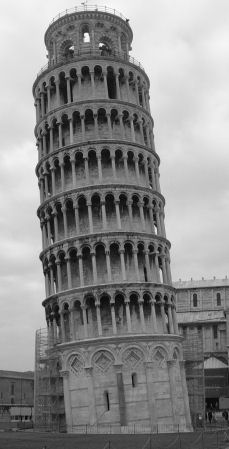
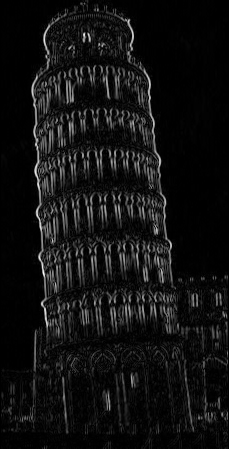
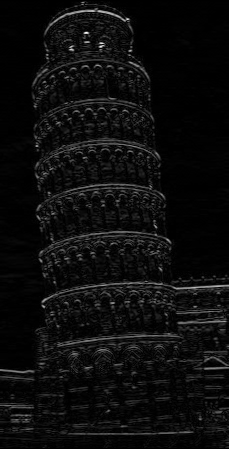
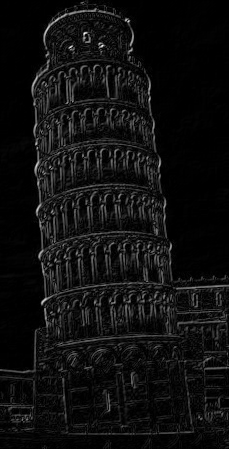
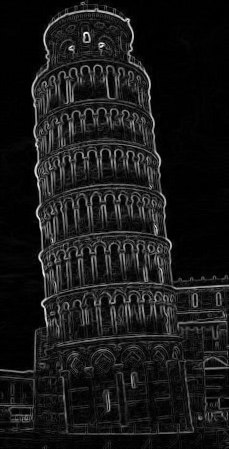

In [132]:
img = cv.imread('immagini/torre.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

sobel_x = cv.Sobel(img, cv.CV_32F, 1, 0)
sobel_y = cv.Sobel(img, cv.CV_32F, 0, 1)
#sobel = cv.Sobel(img, cv.CV_32F, 1, 1)

sobel = (sobel_x + sobel_y)/2
sobel_y = abs(sobel_y)
sobel_x = abs(sobel_x)
sobel = abs(sobel)

dx, dy = cv.spatialGradient(img)
dx, dy = dx.astype(np.float32), dy.astype(np.float32) 
spatialGradient = cv.magnitude(dx, dy)

va.show(img, sobel_x, sobel_y, sobel, spa)

### scharr

,,,
,,,

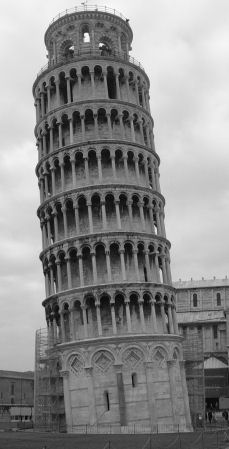
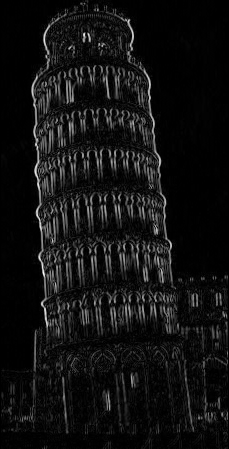
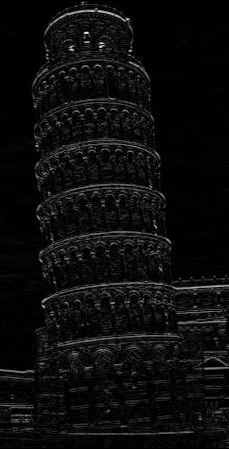
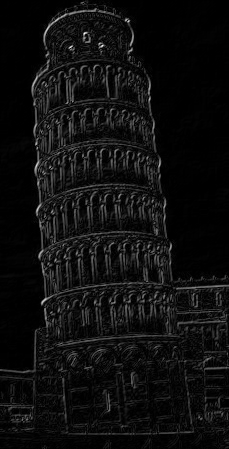

In [126]:
img = cv.imread('immagini/torre.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

scharr_x = cv.Scharr(img, cv.CV_32F, 1, 0)
scharr_y = cv.Scharr(img, cv.CV_32F, 0, 1)
#scharr = cv.Scharr(img, cv.CV_32F, 1, 1)

scharr = (scharr_x + scharr_y)/2
scharr_y = abs(scharr_y)
scharr_x = abs(scharr_x)
scharr = abs(scharr)

va.show(img, scharr_x, scharr_y, scharr)

## canny edge detector

In [143]:
img = cv.imread('immagini/torre.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

@interact(k=(1, 12, 2), t1=(0, 256), t2=(0, 256))
def canny_edge(k=9, t1=62, t2=108):
    canny = cv.GaussianBlur(img, (k, k), 0)
    canny = cv.Canny(canny, t1, t2)
    va.show(img, canny)

interactive(children=(IntSlider(value=9, description='k', max=12, min=1, step=2), IntSlider(value=62, descript…

## canny edge con median blur

In [151]:
img = cv.imread('immagini/torre.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

@interact(k=(1, 12, 2), k1=(1, 12, 2), t1=(0, 256), t2=(0, 256))
def canny_edge(k=9, k1=3, t1=256, t2=0):
    median = cv.medianBlur(img, k)
    canny = cv.GaussianBlur(median, (k1, k1), 0)
    canny = cv.Canny(canny, t1, t2)
    va.show(img, median, canny)

interactive(children=(IntSlider(value=9, description='k', max=12, min=1, step=2), IntSlider(value=3, descripti…

# estrazione del contorno

In [5]:
img = cv.imread('immagini/toys.png')

h, l, s = cv.split(cv.cvtColor(fg, cv.COLOR_BGR2HLS))
bg = l==0
mask = img.copy()
mask = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)
mask[bg] = 0
mask[~bg] = 255
mask = np.uint8(mask)

contours, tree = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

for c in contours:
    cv.drawContours(img, [c], -1, (255,255,255), 2)

va.show(img, mask)

NameError: name 'fg' is not defined

# etichettatura delle componenti connesse

,
,

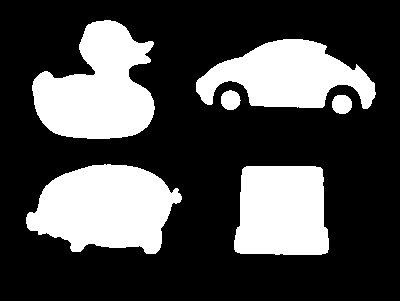
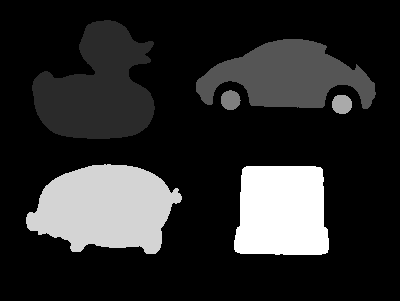

In [189]:
n, cc = cv.connectedComponents(mask)
va.show(mask, cc)

# morfologia matematica

## open vs erode

In [209]:
img = cv.imread('immagini/morph-open.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, img = cv.threshold(img, 128, 256, cv.CV_8U)

@interact(k=(20,40))
def morph_open(k=32):
    se = cv.getStructuringElement(cv.MORPH_ELLIPSE, (k, k))
    o = cv.morphologyEx(img, cv.MORPH_OPEN, se)
    e = cv.morphologyEx(img, cv.MORPH_ERODE, se)

    va.show(img, o, e)

interactive(children=(IntSlider(value=32, description='k', max=40, min=20), Output()), _dom_classes=('widget-i…

## close vs dilate

In [210]:
img = cv.imread('immagini/morph-close.png')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, img = cv.threshold(img, 128, 256, cv.CV_8U)

@interact(k=(1,30))
def morph_open(k=24):
    se = cv.getStructuringElement(cv.MORPH_ELLIPSE, (k, k))
    o = cv.morphologyEx(img, cv.MORPH_CLOSE, se)
    d = cv.morphologyEx(img, cv.MORPH_DILATE, se)

    va.show(img, o, d)

interactive(children=(IntSlider(value=24, description='k', max=30, min=1), Output()), _dom_classes=('widget-in…